In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

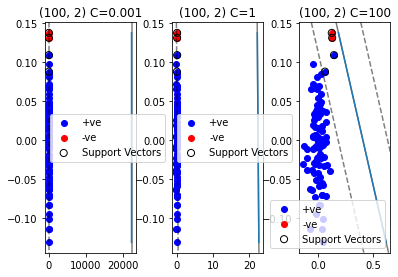

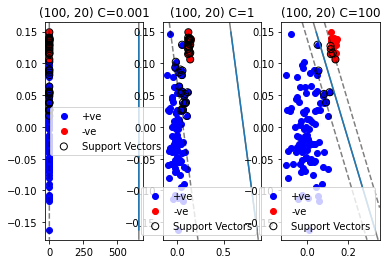

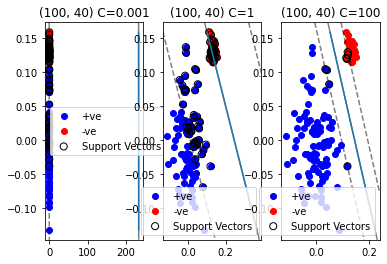

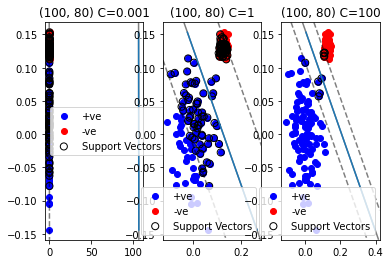

In [8]:
ratio = [(100, 2), (100, 20), (100, 40), (100, 80)]
reg_strength = [0.001, 1, 100]
fig = plt.figure()

for first, second in ratio: 

  # Draw random samples: Positive and Negative, from a normal (Gaussian) distribution.
  xp = np.random.normal(0, 0.05, (first, 2))
  xn = np.random.normal(0.13, 0.01, (second, 2))

  # Create y labels based on shape of Positive and Negative X 
  yp = np.array([1] * xp.shape[0]).reshape(-1, 1)
  yn = np.array([-1] * xn.shape[0]).reshape(-1, 1)

  # Stack arrays in sequence vertically (row wise) 
  X = np.vstack((xp, xn))
  y = np.vstack((yp, yn))

  count = 0

  for i in range(0, len(reg_strength)): 
    
    plt.subplot(1, 3, count+1)
    count +=1 

    # scatter sub-plot using X-positive and X-negative  
    plt.scatter(xp[:, 0], xp[:, 1], color = 'blue', label = "+ve")
    plt.scatter(xn[:, 0], xn[:, 1], color = 'red', label = "-ve")

    # Use SVC with linear Kernel to fit the data and find best optimal hyperplane 
    clf = SVC(C = reg_strength[i], kernel='linear')
    clf.fit(X, y)

    intercept = clf.intercept_
    coef      = clf.coef_[0]
    mi        = min(X[:, 1]) 
    ma        = max(X[:, 1])

    # to draw the separating hyper plane ax+by+c=0, with weights [a, b] and the intercept is c we are creating two points
    # 1. ((b*min-c)/a, min) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the minimum value of x[:, 1]
    # 2. ((b*max-c)/a, max) i.e ax+by+c=0 ==> ax = (-by-c) ==> x = (-by-c)/a here in place of y we are keeping the maximum value of x[:, 1]

    points=np.array([ [ ((-coef[1]*mi - intercept)/coef[0]), mi],[((-coef[1]*ma - intercept)/coef[0]), ma]])
    plt.plot(points[:,0], points[:,1])


    # plot support vectors 
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 50, facecolors="none", edgecolors="k", label="Support Vectors")    
    plt.legend() # Add legend to each sub plot
    plt.title(str("("+str(first)+", "+str(second)+")")+' C='+str(reg_strength[i])) # add title to each subplot 

    ax = plt.gca()        # to get the current polar axes on the current figure
    xlim = ax.get_xlim()  #return the x-axis limits in data coordinates
    ylim = ax.get_ylim()  #return the y-axis limits in data coordinates
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
    
  plt.show()


n SVM we are looking for a hyperplane that classify as many datapoints correctly as possible and that hyperplane should be maximising the minimum geometric margin.

The parameter C determines how great our wish is to separates as much correctly as possible.

If c is low -> it gives large minimum margin, it might be possible that we neglect some datapoints that have failed to classify correctly. Example when C=0.001, margin is very large and most of the data points are not correctly classified by decision boundry (line/plane/hyperplane)

If c is high -> means we can’t neglect most of the points and end up with smaller margin. For example, when C=100 most of the data points classified correctly and margin is very low.